In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('used_cars_data.csv')
data.head()
# len(data)
# data.shape

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [7]:
data['Name'].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Ford EcoSport 1.5 Petrol Ambiente',
       'Jeep Compass 1.4 Sport', 'Hyundai Elite i20 Magna Plus'],
      dtype=object)

In [ ]:
data['BoolCol']=True

In [ ]:
data.info()

In [ ]:
data=data.drop(['BoolCol'], axis=1)

In [ ]:
data.info()

In [11]:
print(data.head(1))
data1=data.loc[(data['Name'] == 'Maruti Wagon R LXI CNG')]
print(len(data1))
data2=data1[['Name','Year','Price','Location','Owner_Type','Kilometers_Driven']].sort_values(by=['Year'])
print(data2)
# print(len(data2))

   S.No.                    Name Location  Year  Kilometers_Driven Fuel_Type  \
0      0  Maruti Wagon R LXI CNG   Mumbai  2010              72000       CNG   

  Transmission Owner_Type     Mileage  Engine      Power  Seats New_Price  \
0       Manual      First  26.6 km/kg  998 CC  58.16 bhp    5.0       NaN   

   Price  
0   1.75  
18
                        Name  Year  Price   Location Owner_Type  \
0     Maruti Wagon R LXI CNG  2010   1.75     Mumbai      First   
3097  Maruti Wagon R LXI CNG  2012   3.00       Pune     Second   
2638  Maruti Wagon R LXI CNG  2012   2.90       Pune      First   
5902  Maruti Wagon R LXI CNG  2012   2.25     Mumbai      First   
1780  Maruti Wagon R LXI CNG  2013   3.15     Mumbai      First   
2376  Maruti Wagon R LXI CNG  2013   2.95  Hyderabad     Second   
127   Maruti Wagon R LXI CNG  2013   3.25       Pune      First   
3295  Maruti Wagon R LXI CNG  2013   2.80      Delhi      First   
3455  Maruti Wagon R LXI CNG  2014   3.50     Mumbai    

In [14]:
data['new_engine']=data['Engine'].str.split().str.get(0)
# data['Engine']=data['Engine'].fillna(value='EMPTY')

# data['new_engine']=data['Engine'].apply(lambda x: x.split()[0])
data['new_engine']=pd.to_numeric(data['new_engine'],errors="coerce")            

In [15]:
data['new_engine'].unique()

array([ 998., 1582., 1199., 1248., 1968.,  814., 1461., 2755., 1598.,
       1462., 1497., 2179., 2477., 1498., 2143., 1995., 1984., 1197.,
       2494., 1798., 2696., 2698., 1061., 1198., 2987.,  796.,  624.,
       1999., 1991., 2694., 1120., 2498.,  799., 2393., 1399., 1796.,
       2148., 1396., 1950., 4806., 1998., 1086., 1193., 2982., 1493.,
       2967., 2993., 1196., 1799., 2497., 2354., 1373., 2996., 1591.,
       2894., 5461., 1595.,  936., 1997.,   nan, 1896., 1390., 1364.,
       2199.,  993.,  999., 1405., 2956., 1794.,  995., 2496., 1599.,
       2400., 1495., 2523.,  793., 4134., 1596., 1395., 2953., 1586.,
       2362., 1496., 1368., 1298., 1956., 1299., 3498., 2835., 1150.,
       3198., 1343., 1499., 1186., 1590., 2609., 2499., 2446., 1978.,
       2360., 3436., 2198., 4367., 2706., 1422., 2979., 1969., 1489.,
       2489., 1242., 1388., 1172., 2495., 1194., 3200., 1781., 1341.,
       2773., 3597., 1985., 2147., 1047., 2999., 2995., 2997., 1948.,
       2359., 4395.,

In [16]:
data.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
new_engine           float64
dtype: object

In [17]:
data=data.drop(['S.No.'],axis=1)
# data.head(5)

In [19]:
data['Engine']=data['Engine'].replace("EMPTY",np.nan)

In [20]:
data['Engine'].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0
new_engine,7207.0,1616.573470,595.285137,72.00,1198.0,1493.00,1968.00,5998.0


In [25]:
data['Name'].value_counts()

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64

In [26]:
stringColList=['Name','Location','Fuel_Type','Transmission','Owner_Type']
for col in stringColList:
    value=data[col].value_counts()
    print(col)
    print(value)
    print()

Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64

Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

Transmission
Manual       5204
Automatic    2049
Name: Transmission, dtype: int64

Owner_Type
First             5952
Se

In [23]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7207,386,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
5204/7253

0.7174962084654626

In [ ]:
Task #1
--------
1. 1996 to 2019 - 23 years of the sample used cars data available
2.People has bought 53.1%  Diesel Cars most of the times comparing other fuels.
3.About 6000 owners of the cars are not re-selling as their owner type is First
4.more than 75% Seats are 5  in cars
5. Transmission-manual cars are preferred by almost 71%  of the people
6.Price and kilometers_driven are having more deviations between min and max


Task #2
-------
# data['Engine']=data['Engine'].replace("EMPTY",np.nan)
# data['Engine'].unique()

Task #3
---------
new_Mileage column is added with single unit for all



In [29]:
data['Model']=data['Name'].str.split().str.get(0)
data['Brand']=data['Name'].str.split().str.get(1)+data['Name'].str.split().str.get(2)

In [34]:
data[['Fuel_Type','Mileage']]

,Fuel_Type,Mileage
0,CNG,26.6 km/kg
1,Diesel,19.67 kmpl
2,Petrol,18.2 kmpl
3,Diesel,20.77 kmpl
4,Diesel,15.2 kmpl
...,...,...
7248,Diesel,20.54 kmpl
7249,Petrol,17.21 kmpl
7250,Diesel,23.08 kmpl
7251,Petrol,17.2 kmpl


In [39]:
fuelTypeList=data['Fuel_Type'].unique()

In [40]:
for Fuel_type in fuelTypeList:
    print(Fuel_type)
    dfx=data.loc[data['Fuel_Type']==Fuel_type]
    dfx['Mileage_Units']=dfx['Mileage'].str.split().str.get(1)
    # dfx['Mileage_Units'].unique()
    print(dfx['Mileage_Units'].unique())

CNG
['km/kg']
Diesel
['kmpl']
Petrol
['kmpl']
LPG
['km/kg']
Electric
[nan]


In [31]:
data['Mileage_CC']=data['Mileage'].str.split().str.get(0)
data['Mileage_CC']=pd.to_numeric(data['Mileage_CC'])

# data.loc[data['Fuel_Type'] == 'Petrol','New_Mileage']=round(data['Mileage_CC']/0.79)
# data.loc[data['Fuel_Type'] == 'Diesel','New_Mileage']=round(data['Mileage_CC']/0.84)
# data.loc[data['Fuel_Type'] == 'CNG','New_Mileage']=round(data['Mileage_CC'])


def convert_mileage(row):
    if row['Fuel_Type']=='Petrol' :
        val=round((row['Mileage_CC']/0.79))
    elif row['Fuel_Type']=='Diesel' :
        val=round((row['Mileage_CC']/0.84))
    elif row['Fuel_Type']=='CNG' :
        val=round((row['Mileage_CC']))
    elif row['Fuel_Type']=='LPG' :
        val=round((row['Mileage_CC']))
    else:
        val=row['Mileage_CC']
    return val
                  
data['New_Mileage']=data.apply(convert_mileage,axis=1)
data.sample(25)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_engine,Model,Brand,Mileage_CC
6919,ISUZU D-MAX V-Cross 4X4,Jaipur,2017,290000,Diesel,Manual,First,12.4 kmpl,2499 CC,134 bhp,5.0,NaN,NaN,2499.0,ISUZU,D-MAXV-Cross,12.40
781,Ford Figo Diesel EXI,Coimbatore,2014,74980,Diesel,Manual,First,20.0 kmpl,1399 CC,68 bhp,5.0,NaN,4.08,1399.0,Ford,FigoDiesel,20.00
6421,Hyundai i10 Sportz 1.2,Coimbatore,2012,31736,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,NaN,NaN,1197.0,Hyundai,i10Sportz,20.36
2549,Maruti Swift Dzire VXI,Pune,2014,68218,Petrol,Manual,First,19.1 kmpl,1197 CC,85.8 bhp,5.0,NaN,4.90,1197.0,Maruti,SwiftDzire,19.10
352,Maruti Alto K10 VXI,Pune,2017,30000,Petrol,Manual,First,24.07 kmpl,998 CC,67.1 bhp,5.0,4.48 Lakh,3.75,998.0,Maruti,AltoK10,24.07
5996,Jaguar XF 2.2 Litre Luxury,Kochi,2016,31150,Diesel,Automatic,First,16.36 kmpl,2179 CC,187.7 bhp,5.0,NaN,30.54,2179.0,Jaguar,XF2.2,16.36
2688,Mercedes-Benz GLA Class 200 CDI SPORT,Chennai,2015,54000,Diesel,Automatic,First,17.9 kmpl,2143 CC,136 bhp,5.0,NaN,17.55,2143.0,Mercedes-Benz,GLAClass,17.90
3004,Maruti Ritz VDi,Pune,2012,64290,Diesel,Manual,First,23.2 kmpl,1248 CC,73.94 bhp,5.0,NaN,3.65,1248.0,Maruti,RitzVDi,23.20
6929,Honda City i DTEC SV,Delhi,2014,36390,Diesel,Manual,First,26.0 kmpl,1498 CC,98.6 bhp,5.0,NaN,NaN,1498.0,Honda,Cityi,26.00
108,Mahindra XUV500 W8 2WD,Delhi,2012,65000,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0,NaN,5.75,2179.0,Mahindra,XUV500W8,16.00


In [9]:
# data_g=data.loc[(data['Fuel_Type']=='Petrol','CNG')] #error
# data_g=data.loc[(data['Mileage'] ==np.nan)] #error
data_g=pd.isnull(data['Mileage'])
data[data_g]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


In [10]:
data[data['Fuel_Type'].isin(['LPG','Electric'])]

#Error below

# results = data.loc[data["Fuel_Type"].isin(['LPG','Electric'])]
# data[results]


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
936,936,Maruti Wagon R LXI LPG BSIV,Hyderabad,2012,72000,LPG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,NaN,2.85
987,987,Maruti Wagon R LXI DUO BSIII,Mumbai,2008,64226,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.0,NaN,1.45
2278,2278,Hyundai Santro Xing GLS LPG,Pune,2010,55000,LPG,Manual,Second,13.45 km/kg,1086 CC,62.1 bhp,5.0,NaN,1.65
2385,2385,Hyundai Santro Xing GLS LPG,Hyderabad,2011,17000,LPG,Manual,First,13.45 km/kg,1086 CC,62.1 bhp,5.0,NaN,3.10
2436,2436,Hyundai i10 Magna LPG,Jaipur,2012,53000,LPG,Manual,Second,19.2 km/kg,1086 CC,68.05 bhp,5.0,NaN,2.85
2941,2941,Hyundai Santro Xing GL Plus LPG,Hyderabad,2014,56000,LPG,Manual,First,13.45 km/kg,1086 CC,62.1 bhp,5.0,NaN,3.20
3595,3595,Maruti Wagon R LX DUO BSIII,Hyderabad,2007,65047,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.0,NaN,1.95
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


In [ ]:
data.nunique()

In [39]:
data['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [ ]:
data.isnull().sum()

In [ ]:

date.today().year

In [ ]:
data.nunique()

In [ ]:
data["Engine"]
data.Engine

In [ ]:
data["Engine"].isnull().sum()
data.Engine.isnull().sum()

In [ ]:
data.Engine.unique()

In [ ]:
data["Eng_cc"]=data["Engine"].str.split().str.get(0)
data["Eng_cc"]

In [ ]:
data.head(1)

In [74]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price', 'Model', 'Brand'],
      dtype='object')
Numerical Variables:
['S.No.', 'Year', 'Kilometers_Driven', 'Seats', 'Price', 'Mileage_CC', 'New_Mileage']


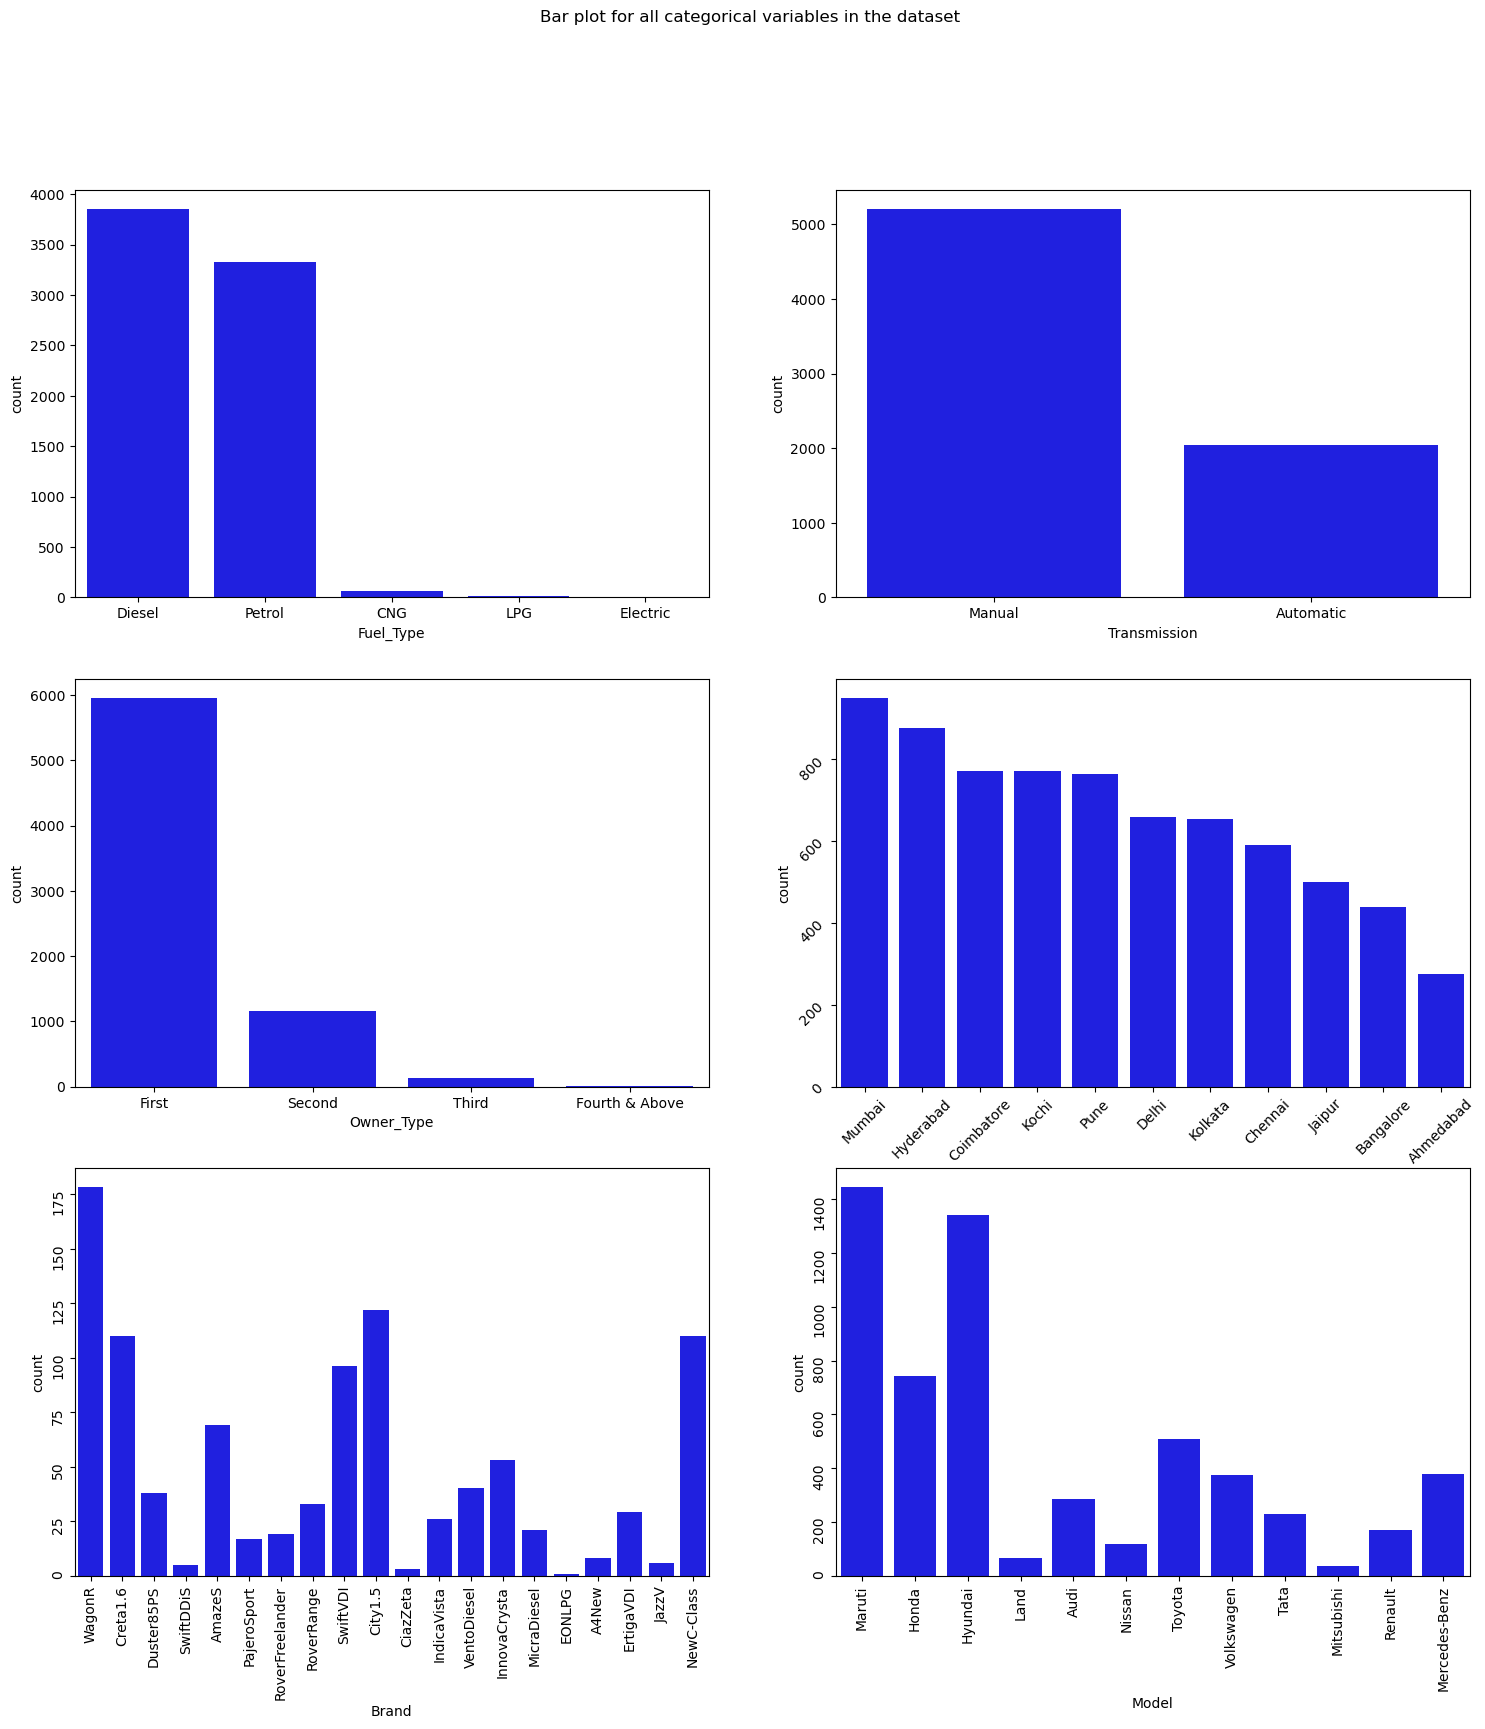

In [13]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = data, color = 'blue', 
              order = data['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = data, color = 'blue', 
              order = data['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = data, color = 'blue', 
              order = data['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = data, color = 'blue', 
              order = data['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = data, color = 'blue', 
              order = data['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = data, color = 'blue', 
              order = data['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

In [15]:
data["Mileage"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7253 entries, 0 to 7252
Series name: Mileage
Non-Null Count  Dtype 
--------------  ----- 
7251 non-null   object
dtypes: object(1)
memory usage: 56.8+ KB
